In [19]:
import torch

In [20]:
USE_CUDA = torch.cuda.is_available()
device = torch.device("cuda" if USE_CUDA else "cpu")
print("사용 기기 : ", device)

사용 기기 :  cpu


In [21]:
#random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [22]:
# 하이퍼파라미트 변수
training_epochs = 15
batch_size = 100

In [23]:
# MNIST 분류기 구현하기
# torchvision.datasets.dsets,MNIST를 사용

In [24]:
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

In [25]:
mnist_train = dsets.MNIST(root = 'MNIST_data/', train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root = 'MNIST_data/', train=True,
                          transform=transforms.ToTensor(),
                          download=True)

In [26]:
# dataset loader
data_loader = DataLoader(dataset=mnist_train,
                         batch_size=batch_size, #배치크기는 100
                         shuffle=True,
                         drop_last=True)
data_loader

In [27]:
import torch.nn as nn
import matplotlib.pyplot as plt

In [28]:
# 실제 모듈 설계 input_dim 874, output_dim 10
linear = nn.Linear(784,10, bias=True).to(device)

In [29]:
# 비용 함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss().to(device) #내부적으로 소프트맥스 함수를 포함하고 있음
print(linear.parameters())
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

<generator object Module.parameters at 0x0000021D862287B0>


In [31]:
for epoch in range(training_epochs): # 위에서 training_epochs의 값은 15로 지정함.
    avg_cost=0
    total_batch=len(data_loader) 
    
    for X, Y in data_loader: # 배치 크기가 100 ==> X는 (100, 784)의 텐서
        X=X.view(-1,28*28).to(device)
         # 레이블은 원-핫 인코딩이 된 상태가 아니라 0 ~ 9의 정수.
        Y=Y.to(device)
        
        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()
        
        avg_cost += cost/total_batch
    print('Epoch : ', '%04d'%(epoch+1), 'cost=', '{:.9f}'.format(avg_cost))

Epoch :  0001 cost= 0.535701573
Epoch :  0002 cost= 0.359403163
Epoch :  0003 cost= 0.331129968
Epoch :  0004 cost= 0.316610843
Epoch :  0005 cost= 0.307287753
Epoch :  0006 cost= 0.300151169
Epoch :  0007 cost= 0.295128852
Epoch :  0008 cost= 0.290526152
Epoch :  0009 cost= 0.287431389
Epoch :  0010 cost= 0.284428835
Epoch :  0011 cost= 0.281726092
Epoch :  0012 cost= 0.279582143
Epoch :  0013 cost= 0.277621865
Epoch :  0014 cost= 0.275999963
Epoch :  0015 cost= 0.274319828


In [36]:
import random

Accuracy :  0.8798499703407288
Label :  9
Prediction :  4


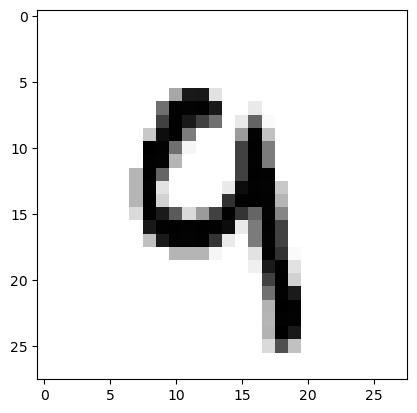

In [102]:
# 테스트 데이터를 사용하여 모델을 테스트
with torch.no_grad(): # torch.no_rade()를 하면 gradient 계산을 수행하지 않는다.
    X_test = mnist_test.test_data.view(-1, 28*28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)
    
    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy : ', accuracy.item())
    
		#MNIST 테스트 데이터에서 무작위 하나 뽑아서 예측
    r =random.randint(0, len(mnist_test)-1)
    # print(r)
    X_single_data = mnist_test.test_data[r:r+1].view(-1,28*28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r+1].to(device)
    
    print('Label : ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction : ',torch.argmax(single_prediction,1).item())
    
    plt.imshow(mnist_test.test_data[r:r+1].view(28,28),cmap='Greys', interpolation='nearest')
    plt.show()